In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation
from keras.layers.core import Dense, Dropout
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [40]:
#download the weather images and put them in a directory
path = '/home/Tim/Downloads/Multi-class Weather Dataset'
folders = os.listdir(path)
print(folders)

['Sunrise', 'Cloudy', 'Rain', 'Shine']


In [41]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [58]:
#this is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [59]:
#compile and run the model
#how many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 50, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

Epoch 1/50
28/28 [==============================] - 22s 761ms/step - loss: 0.1226 - accuracy: 0.5972 - val_loss: 0.1038 - val_accuracy: 0.7098
Epoch 2/50
28/28 [==============================] - 21s 746ms/step - loss: 0.1064 - accuracy: 0.7146 - val_loss: 0.0907 - val_accuracy: 0.7634
Epoch 3/50
28/28 [==============================] - 21s 735ms/step - loss: 0.0676 - accuracy: 0.8147 - val_loss: 0.0897 - val_accuracy: 0.7857
Epoch 4/50
28/28 [==============================] - 22s 772ms/step - loss: 0.0612 - accuracy: 0.8320 - val_loss: 0.0778 - val_accuracy: 0.7723
Epoch 5/50
28/28 [==============================] - 21s 754ms/step - loss: 0.0499 - accuracy: 0.8665 - val_loss: 0.0802 - val_accuracy: 0.7812
Epoch 6/50
28/28 [==============================] - 21s 745ms/step - loss: 0.0435 - accuracy: 0.8849 - val_loss: 0.0569 - val_accuracy: 0.8348
Epoch 7/50
28/28 [==============================] - 22s 779ms/step - loss: 0.0373 - accuracy: 0.9079 - val_loss: 0.0764 - val_accuracy: 0.8036

In [60]:
results = pd.DataFrame(model.history.history)

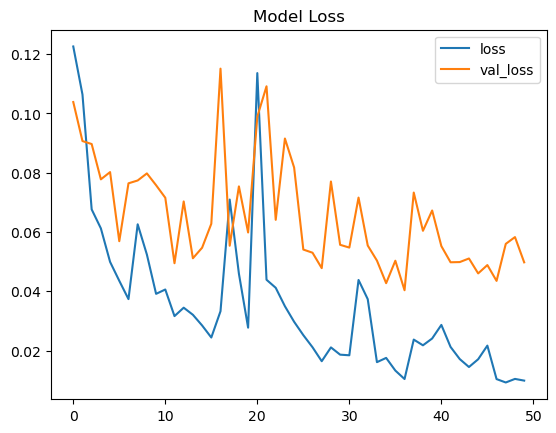

In [61]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

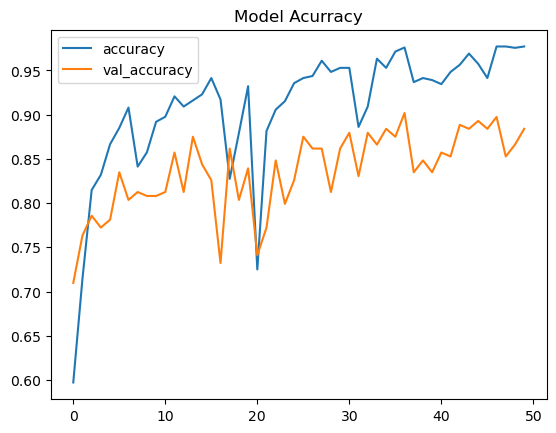

In [62]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [63]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.9769850373268127, Val_Accuracy: 0.8839285969734192
Loss: 0.009842922911047935, Val_Loss: 0.0497504360973835


11/11 [==============================] - 2s 139ms/step


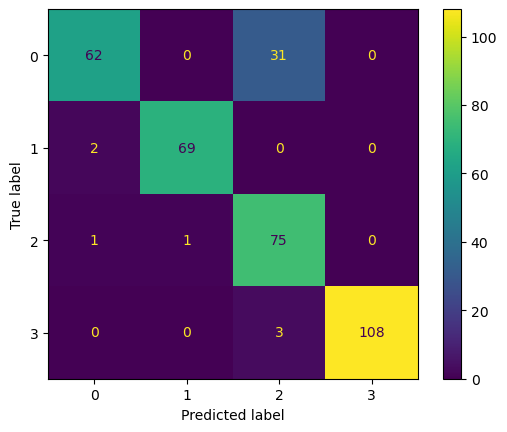

In [64]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [65]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 [==============================] - 0s 114ms/step


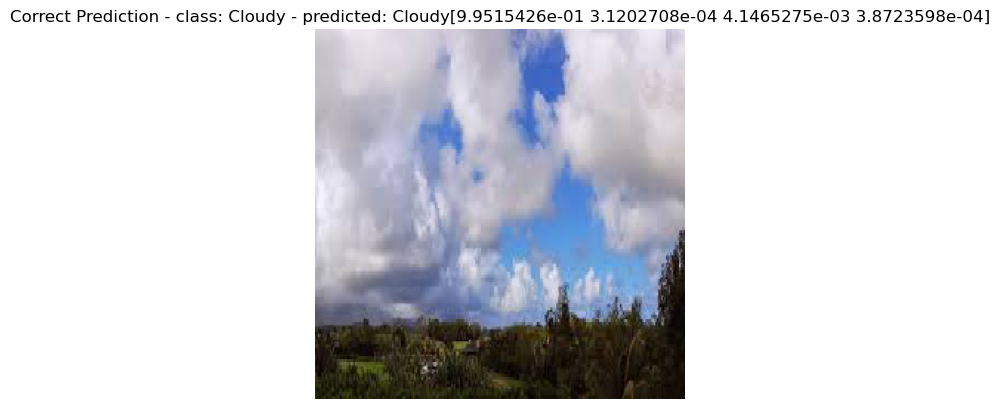

In [34]:
predict_one(model, 1) #<--you can show multiple pictures with this command. Just fill in the number you want to see.